In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
datasetIncendios = pd.read_csv('./modis_2021_Spain_incendios.csv')
datasetIncendios.iloc[:, [0,1,2,5]]

,latitude,longitude,brightness,acq_date
0,37.0886,-5.8802,300.4,2021-01-02
1,36.6599,-4.8777,305.5,2021-01-02
2,36.8729,-2.4486,304.8,2021-01-02
3,36.8745,-2.4347,334.7,2021-01-02
4,40.2352,-0.8699,320.1,2021-01-04
...,...,...,...,...
4720,43.1755,-5.4329,309.2,2021-12-31
4721,43.2442,-3.7813,316.1,2021-12-31
4722,43.1631,-5.5095,303.0,2021-12-31
4723,43.2663,-4.4370,303.2,2021-12-31


In [6]:
datasetEstaciones = pd.read_excel('./ListadoEstaciones-20190206.xlsx')
datasetEstaciones.iloc[:,[2,4,5,6]]

,A CORUÑA AEROPUERTO,431825N,082219W,98
0,A CORUÑA,432157N,082517W,58
1,CABO VILAN,430938N,091239W,50
2,ESTACA DE BARES,434710N,074105W,80
3,FISTERRA,425529N,091729W,230
4,MONTE IROITE,424314N,085524W,685
...,...,...,...,...
285,CALATAYUD,411952N,013843W,582
286,DAROCA,410652N,012436W,779
287,SOS DEL REY CATÓLICO,422927N,011249W,626
288,ZARAGOZA AEROPUERTO,413938N,010015W,249


In [7]:
datasetClima = pd.read_excel('./Clima Aemet 2021/Aemet2021-01/Aemet2021-01-01.xls')
datasetEstaciones = pd.read_excel('./ListadoEstaciones-20190206.xlsx')
datasetEstaciones.iloc[:,[2,4,5,6]]
datasetClima = datasetClima.assign(latitude =  np.zeros(len(datasetClima)))
datasetClima = datasetClima.assign(longitude = np.zeros(len(datasetClima)))

for x in range(len(datasetClima)):
    if x >= 4:
        for y in range(len(datasetEstaciones)):
            if datasetClima.iloc[x,0].upper() == datasetEstaciones.iloc[y,2].upper():
                datasetClima.iloc[x,-2] = int(datasetEstaciones.iloc[y,4][:2])+int(datasetEstaciones.iloc[y,4][2:4])/60 + int(datasetEstaciones.iloc[y,4][4:6])/3600
                datasetClima.iloc[x,-1] = (int(datasetEstaciones.iloc[y,5][:2])+int(datasetEstaciones.iloc[y,5][2:4])/60 + int(datasetEstaciones.iloc[y,5][4:6])/3600)*-1
                break
            else:
                datasetClima.iloc[x,-2] = None
                datasetClima.iloc[x,-1] = None
datasetClima[16:26]


,España,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,latitude,longitude
16,Noia,A Coruña,7.5 (14:00),2.6 (07:00),5,24 (16:20),5 (16:20),11.6,2.6,2,3.2,3.8,NaN,NaN
17,Monte Iroite,A Coruña,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.720556,-8.923333
18,Boiro,A Coruña,9.6 (15:40),2.1 (09:50),5.9,NaN,NaN,5.6,1.8,0.6,1.4,1.8,NaN,NaN
19,Padrón,A Coruña,8.7 (14:40),1.8 (04:40),5.2,36 (15:50),19 (15:50),18.1,3,3.1,5.9,6.1,42.738333,-8.627222
20,Santiago de Compostela,A Coruña,6.6 (14:30),2.4 (03:50),4.5,27 (11:20),7 (15:20),16.7,2.3,2.9,7,4.5,42.876111,-8.555833
21,"Rois, Casas do Porto",A Coruña,7.8 (15:30),2.1 (10:00),5,NaN,NaN,15.2,3.2,4,4.4,3.6,NaN,NaN
22,Ossa de Montiel,Albacete,5.2 (14:40),-1.0 (23:59),2.1,46 (02:10),20 (00:30),15,2.8,5.2,7,0,NaN,NaN
23,Villarrobledo,Albacete,8.5 (15:40),0.2 (02:40),4.4,42 (13:10),28 (14:10),7.8,2.4,5.4,0,0,NaN,NaN
24,Munera,Albacete,4.6 (15:40),-0.4 (23:40),2.1,32 (14:10),15 (15:50),10.6,3.4,1.4,5.8,0,NaN,NaN
25,"Yeste, Embalse Fuensanta",Albacete,7.2 (14:40),2.5 (21:50),4.8,NaN,NaN,3.8,1.8,0.6,0.4,1,NaN,NaN


In [13]:
datasetClima[600:625]

,España,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,latitude,longitude
600,"Velilla del Río Carrión, Camporredondo de Alba",Palencia,-1.1 (14:30),-8.3 (23:50),-4.7,0 (00:10),0 (00:10),0.2,0,0,0.2,0,NaN,NaN
601,Carrión de los Condes,Palencia,4.7 (15:10),-3.7 (07:30),0.5,44 (16:20),18 (16:30),0,0,0,0,0,42.350833,-4.617222
602,Autilla del Pino,Palencia,4.2 (16:00),-4.2 (23:30),0,51 (15:50),36 (14:50),0,0,0,0,0,41.995556,-4.602778
603,Palencia,Palencia,5.6 (15:00),-1.6 (23:20),2,47 (16:00),31 (16:00),0,0,0,0,0,NaN,NaN
604,"Santervás de la Vega, Villapún",Palencia,2.8 (14:20),-3.7 (23:59),-0.5,38 (16:20),23 (14:30),0,0,0,0,0,NaN,NaN
605,Silleda,Pontevedra,6.0 (12:40),0.9 (09:20),3.4,28 (13:20),14 (13:20),10.2,2,2.6,3,2.6,NaN,NaN
606,A Estrada,Pontevedra,6.1 (14:40),1.7 (02:00),3.9,NaN,NaN,15.4,3.2,3.8,5,3.4,NaN,NaN
607,VilagarcÍa de Arousa,Pontevedra,9.7 (15:50),2.8 (04:30),6.2,37 (16:30),16 (16:30),6.8,1.2,1.2,3,1.4,NaN,NaN
608,Pontevedra,Pontevedra,7.8 (15:00),1.6 (04:30),4.7,26 (16:40),12 (16:40),11.4,2.4,1.6,6,1.4,42.438333,-8.615833
609,A Lama,Pontevedra,5.2 (13:00),-0.6 (02:30),2.3,19 (16:00),9 (14:50),10.2,0,2.4,6.8,1,NaN,NaN


In [192]:
res = 0
for x in range(len(datasetClima)):
    if x >= 4:
        for y in range(len(datasetEstaciones)):
            if datasetClima.iloc[x,0].upper() == datasetEstaciones.iloc[y,2].upper():
                res = res + 1
                break
res

217

In [33]:
datasetClima = datasetClima.dropna()

In [19]:
datasetClima.iloc[:, 12]

0       0.000000
1       0.000000
2       0.000000
3       0.000000
4      43.786111
         ...    
795          NaN
796          NaN
797          NaN
798          NaN
799          NaN
Name: latitude, Length: 800, dtype: float64

In [34]:
len(datasetClima)

191

In [57]:
datasetClima

,España,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,latitude,longitude
3,Estación,Provincia,Temperatura máxima (ºC),Temperatura mínima (ºC),Temperatura media (ºC),Racha (km/h),Velocidad máxima (km/h),Precipitación 00-24h (mm),Precipitación 00-06h (mm),Precipitación 06-12h (mm),Precipitación 12-18h (mm),Precipitación 18-24h (mm),0.000000,0.000000
4,Estaca de Bares,A Coruña,10.0 (08:20),6.4 (12:40),8.2,68 (12:40),53 (02:00),5.8,1,1.6,3.2,0,43.786111,-7.684722
7,A Coruña,A Coruña,9.8 (12:20),6.0 (08:00),7.9,61 (14:20),33 (14:20),12,6.8,0.6,1.6,3,43.365833,-8.421389
10,Cabo Vilan,A Coruña,9.9 (13:30),5.3 (04:30),7.6,82 (15:30),60 (15:30),5.1,1.5,1.2,0.7,1.7,43.160556,-9.210833
12,Fisterra,A Coruña,8.7 (10:50),5.0 (23:50),6.8,90 (15:50),52 (15:50),2.8,1,0.2,0.8,0.8,42.924722,-9.291389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,Calatayud,Zaragoza,6.8 (13:50),0.2 (23:30),3.5,46 (15:30),29 (15:30),5,3.2,0.2,0,1.6,41.331111,-1.645278
777,Zaragoza Aeropuerto,Zaragoza,9.3 (16:20),3.1 (23:10),6.2,46 (13:30),35 (13:30),1.2,0,0,0,1.2,41.660556,-1.004167
778,"Zaragoza, Valdespartera",Zaragoza,9.3 (15:50),3.5 (22:40),6.4,52 (12:30),30 (12:30),2.6,0,0,0,2.6,41.620833,-0.935000
792,Trujillo,Cáceres,8.6 (16:30),0.7 (09:00),4.7,32 (08:00),19 (08:00),0.1,0,0.1,0,0,39.482500,-5.854167


In [43]:
import os  
os.makedirs('folder/subfolder', exist_ok=True)  
datasetClima.to_csv('folder/subfolder/out.csv') 

In [45]:
dataset = pd.read_csv('./out.csv')
dataset

,Estación,Provincia,Temperatura máxima (ºC),Temperatura mínima (ºC),Temperatura media (ºC),Racha (km/h),Velocidad máxima (km/h),Precipitación 00-24h (mm),Precipitación 00-06h (mm),Precipitación 06-12h (mm),Precipitación 12-18h (mm),Precipitación 18-24h (mm),latitude,longitude
0,Estaca de Bares,A Coruña,10.0 (08:20),6.4 (12:40),8.2,68 (12:40),53 (02:00),5.8,1.0,1.6,3.2,0.0,43.786111,-7.684722
1,A Coruña,A Coruña,9.8 (12:20),6.0 (08:00),7.9,61 (14:20),33 (14:20),12.0,6.8,0.6,1.6,3.0,43.365833,-8.421389
2,Cabo Vilan,A Coruña,9.9 (13:30),5.3 (04:30),7.6,82 (15:30),60 (15:30),5.1,1.5,1.2,0.7,1.7,43.160556,-9.210833
3,Fisterra,A Coruña,8.7 (10:50),5.0 (23:50),6.8,90 (15:50),52 (15:50),2.8,1.0,0.2,0.8,0.8,42.924722,-9.291389
4,Santiago de Compostela Aeropuerto,A Coruña,5.9 (12:40),1.1 (04:30),3.5,35 (11:00),19 (14:00),13.8,1.1,4.7,5.8,2.2,42.888056,-8.410556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,Calatayud,Zaragoza,6.8 (13:50),0.2 (23:30),3.5,46 (15:30),29 (15:30),5.0,3.2,0.2,0.0,1.6,41.331111,-1.645278
186,Zaragoza Aeropuerto,Zaragoza,9.3 (16:20),3.1 (23:10),6.2,46 (13:30),35 (13:30),1.2,0.0,0.0,0.0,1.2,41.660556,-1.004167
187,"Zaragoza, Valdespartera",Zaragoza,9.3 (15:50),3.5 (22:40),6.4,52 (12:30),30 (12:30),2.6,0.0,0.0,0.0,2.6,41.620833,-0.935000
188,Trujillo,Cáceres,8.6 (16:30),0.7 (09:00),4.7,32 (08:00),19 (08:00),0.1,0.0,0.1,0.0,0.0,39.482500,-5.854167


In [53]:
datasetClima.iloc[:, 1]
dataset.iloc[:,1]
r = 0
for x in range(len(datasetClima)):
    a = False
    for y in range(len(dataset)):
        if datasetClima.iloc[x, 1] == dataset.iloc[y,1]:
            a = True
            r = r+1
            break
    if a == False: print(datasetClima.iloc[x,1])
r

Provincia


190

In [55]:
import numpy as np
import pandas as pd
import os  

datasetClima = pd.read_excel('./Clima Aemet 2021/Aemet2021-01/Aemet2021-01-01.xls')
datasetEstaciones = pd.read_excel('./ListadoEstaciones-20190206.xlsx')
datasetClima = datasetClima.assign(latitude =  np.zeros(len(datasetClima)))
datasetClima = datasetClima.assign(longitude = np.zeros(len(datasetClima)))

for x in range(len(datasetClima)):
    if x >= 4:
        for y in range(len(datasetEstaciones)):
            if datasetClima.iloc[x,0].upper() == datasetEstaciones.iloc[y,2].upper():
                datasetClima.iloc[x,-2] = int(datasetEstaciones.iloc[y,4][:2])+int(datasetEstaciones.iloc[y,4][2:4])/60 + int(datasetEstaciones.iloc[y,4][4:6])/3600
                datasetClima.iloc[x,-1] = (int(datasetEstaciones.iloc[y,5][:2])+int(datasetEstaciones.iloc[y,5][2:4])/60 + int(datasetEstaciones.iloc[y,5][4:6])/3600)*-1
                break
            else:
                datasetClima.iloc[x,-2] = None
                datasetClima.iloc[x,-1] = None

datasetClima = datasetClima.dropna()

os.makedirs('folder/subfolder', exist_ok=True)  
datasetClima.to_csv('folder/subfolder/out.csv',index=False)

In [76]:
datasetIncendios = pd.read_csv('./modis_2021_Spain_incendios.csv')
datasetIncendios = datasetIncendios.iloc[:, [0,1,2,5]]
aux = 0
aaa = []
for x in range(len(datasetIncendios)):
    if aux != datasetIncendios.iloc[x,3]:
        aaa.append(f'./Clima Aemet 2021/Aemet2021-{datasetIncendios.iloc[x,3][5:7]}/Aemet2021-{datasetIncendios.iloc[x,3][5:]}.xls')
    aux = datasetIncendios.iloc[x,3]
aaa

['./Clima Aemet 2021/Aemet2021-01/Aemet2021-01-02.xls',
 './Clima Aemet 2021/Aemet2021-01/Aemet2021-01-04.xls',
 './Clima Aemet 2021/Aemet2021-01/Aemet2021-01-07.xls',
 './Clima Aemet 2021/Aemet2021-01/Aemet2021-01-11.xls',
 './Clima Aemet 2021/Aemet2021-01/Aemet2021-01-12.xls',
 './Clima Aemet 2021/Aemet2021-01/Aemet2021-01-13.xls',
 './Clima Aemet 2021/Aemet2021-01/Aemet2021-01-14.xls',
 './Clima Aemet 2021/Aemet2021-01/Aemet2021-01-15.xls',
 './Clima Aemet 2021/Aemet2021-01/Aemet2021-01-16.xls',
 './Clima Aemet 2021/Aemet2021-01/Aemet2021-01-18.xls',
 './Clima Aemet 2021/Aemet2021-01/Aemet2021-01-21.xls',
 './Clima Aemet 2021/Aemet2021-01/Aemet2021-01-22.xls',
 './Clima Aemet 2021/Aemet2021-01/Aemet2021-01-23.xls',
 './Clima Aemet 2021/Aemet2021-01/Aemet2021-01-24.xls',
 './Clima Aemet 2021/Aemet2021-01/Aemet2021-01-25.xls',
 './Clima Aemet 2021/Aemet2021-01/Aemet2021-01-26.xls',
 './Clima Aemet 2021/Aemet2021-01/Aemet2021-01-27.xls',
 './Clima Aemet 2021/Aemet2021-01/Aemet2021-01-2

In [82]:
import numpy as np
import pandas as pd
import os  

## 186 minutos en ejecutar

os.makedirs('folder/subfolder', exist_ok=True)  

datasetEstaciones = pd.read_excel('./ListadoEstaciones-20190206.xlsx')
datasetIncendios = pd.read_csv('./modis_2021_Spain_incendios.csv')
datasetIncendios = datasetIncendios.iloc[:, [0,1,2,5]]

aux = 0
for di in range(len(datasetIncendios)):
    print(f"iteration {di} with date {datasetIncendios.iloc[di,3]}")
    if aux != datasetIncendios.iloc[di,3]:
        print(f"making Aemet2021-{datasetIncendios.iloc[di,3][5:]}.csv")
        datasetClima = pd.read_excel(f'./Clima Aemet 2021/Aemet2021-{datasetIncendios.iloc[di,3][5:7]}/Aemet2021-{datasetIncendios.iloc[di,3][5:]}.xls')
        datasetClima = datasetClima.assign(latitude =  np.zeros(len(datasetClima)))
        datasetClima = datasetClima.assign(longitude = np.zeros(len(datasetClima)))
        for dc in range(len(datasetClima)):
            if dc >= 4:
                for de in range(len(datasetEstaciones)):
                    if datasetClima.iloc[dc,0].upper() == datasetEstaciones.iloc[de,2].upper():
                        datasetClima.iloc[dc,-2] = int(datasetEstaciones.iloc[de,4][:2])+int(datasetEstaciones.iloc[de,4][2:4])/60 + int(datasetEstaciones.iloc[de,4][4:6])/3600
                        datasetClima.iloc[dc,-1] = (int(datasetEstaciones.iloc[de,5][:2])+int(datasetEstaciones.iloc[de,5][2:4])/60 + int(datasetEstaciones.iloc[de,5][4:6])/3600)*-1
                        break
                    else:
                        datasetClima.iloc[dc,-2] = None
                        datasetClima.iloc[dc,-1] = None

        datasetClima = datasetClima.dropna()

        datasetClima.to_csv(f'folder/subfolder/Aemet2021-{datasetIncendios.iloc[di,3][5:]}.csv',index=False)
    aux = datasetIncendios.iloc[di,3]


iteration 0 with date 2021-01-02
making Aemet2021-01-02.csv
iteration 1 with date 2021-01-02
iteration 2 with date 2021-01-02
iteration 3 with date 2021-01-02
iteration 4 with date 2021-01-04
making Aemet2021-01-04.csv
iteration 5 with date 2021-01-04
iteration 6 with date 2021-01-04
iteration 7 with date 2021-01-04
iteration 8 with date 2021-01-07
making Aemet2021-01-07.csv
iteration 9 with date 2021-01-07
iteration 10 with date 2021-01-11
making Aemet2021-01-11.csv
iteration 11 with date 2021-01-11
iteration 12 with date 2021-01-12
making Aemet2021-01-12.csv
iteration 13 with date 2021-01-12
iteration 14 with date 2021-01-12
iteration 15 with date 2021-01-13
making Aemet2021-01-13.csv
iteration 16 with date 2021-01-13
iteration 17 with date 2021-01-14
making Aemet2021-01-14.csv
iteration 18 with date 2021-01-14
iteration 19 with date 2021-01-14
iteration 20 with date 2021-01-15
making Aemet2021-01-15.csv
iteration 21 with date 2021-01-16
making Aemet2021-01-16.csv
iteration 22 with d

In [75]:
import numpy as np
import pandas as pd
from geopy.distance import geodesic

datasetIncendios = pd.read_csv('./modis_2021_Spain_incendios.csv')
datasetIncendios = datasetIncendios.iloc[:, [0,1,2,5]]

df = pd.DataFrame()
df['inc_lat'] = None
df['inc_lon'] = None
df['est_lat'] = None
df['est_lon'] = None
df['distancia'] = None
df['pos_estacion'] = None
df['fecha'] = None
nueva_fila = None

for di in range(len(datasetIncendios)):
    datasetEstaciones = pd.read_csv(f'./folder/subfolder/Aemet{datasetIncendios.iloc[di,-1]}.csv')
    distanciaMenor = None
    filaMenor = 0
    diX = datasetIncendios.iloc[di,0]
    diY = datasetIncendios.iloc[di,1]
    for de in range(len(datasetEstaciones)):
        deX = datasetEstaciones.iloc[de,-2]
        deY = datasetEstaciones.iloc[de,-1]
        distancia = np.sqrt(((diX-deX)**2) + ((diY-deY)**2))
        if distanciaMenor:
            if distanciaMenor > distancia:
                distanciaMenor = distancia
                coorinc = (diX, diY)
                coorest = (deX, deY)
                km = geodesic(coorinc, coorest).miles * 1.60934
                filaMenor = de
                nueva_fila = pd.Series([diX,diY,deX,deY,km,filaMenor, datasetIncendios.iloc[di,-1]], index=df.columns)
        else:
            distanciaMenor = distancia
    df = df.append(nueva_fila, ignore_index=True)

df.to_csv(f'./distancias.csv',index=False)


/tmp/ipykernel_19688/3852405126.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(nueva_fila, ignore_index=True)
/tmp/ipykernel_19688/3852405126.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(nueva_fila, ignore_index=True)
/tmp/ipykernel_19688/3852405126.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(nueva_fila, ignore_index=True)
/tmp/ipykernel_19688/3852405126.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(nueva_fila, ignore_index=True)
/tmp/ipykernel_19688/3852405126.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pan

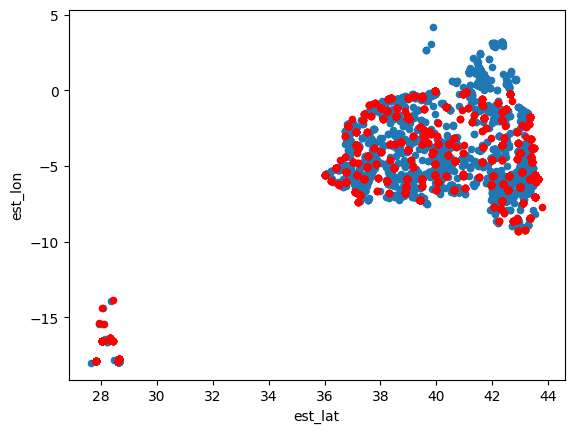

maximo error: 25km


In [101]:
ax = plt.gca()

df.plot(kind='scatter',x='inc_lat',y='inc_lon',ax=ax)
df.plot(kind='scatter',x='est_lat',y='est_lon', color='red', ax=ax)

plt.show()

print("maximo error: 25km")

In [63]:
from geopy.distance import geodesic
newport_ri = (df.iloc[0,0], df.iloc[0,1])
cleveland_oh = (df.iloc[0,2], df.iloc[0,3])
print(geodesic(newport_ri, cleveland_oh).miles * 1.60934)
print(df.iloc[0,0], df.iloc[0,1])
print(df.iloc[0,2], df.iloc[0,3])


25.327145047965757
37.0886 -5.8802
37.16444444444444 -5.6113888888888885


In [5]:
df = pd.read_csv("./distancias.csv")
cont = 0
max = 0
max2 = None
for _ in range(len(df)):
    if df.iloc[_,-3] <= 6:
        cont += 1
    if max < df.iloc[_,-3]:
        max = df.iloc[_,-3]
        max2 = df.iloc[_,:]
print(max)
print(f"menores de 6km: {cont}")
print(len(df))
max2


NameError: name 'df' is not defined